In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
warnings.filterwarnings('ignore')

In [3]:
column_names=["user_id", "item_id", "rating", "timestamp"]
df=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Documents\\machine learning\\ml-100k\\u.data", sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [9]:
movies_title=pd.read_csv("C:/Users/shrey/OneDrive/Documents/machine learning/ml-100k/u.item", sep="|", header=None, encoding='latin1')

In [102]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [106]:
#movies_title=movies_title[[0,1]]
movies_title.columns=["item_id","title"]

movies_title.head()

##


In [12]:
df = pd.merge(df, movies_title, on='item_id')

In [13]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [27]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [33]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [51]:
rating=pd.DataFrame(df.groupby('title').mean()['rating'])

In [52]:
rating['no of rating']=pd.DataFrame(df.groupby('title').count()['rating'])

In [53]:
rating.sort_values(by='rating',ascending=False)

,rating,no of rating
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3
They Made Me a Criminal (1939),5.0,1
...,...,...
Pharaoh's Army (1995),1.0,1
August (1996),1.0,1
Babyfever (1994),1.0,2


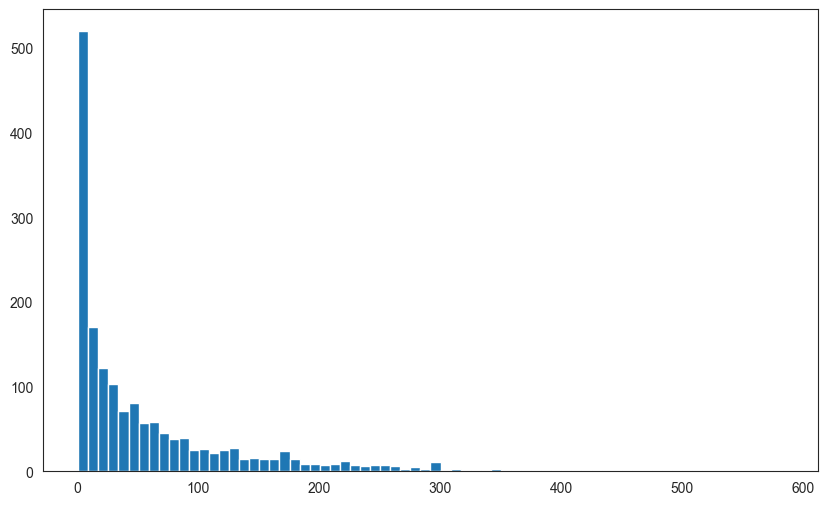

In [56]:
plt.figure(figsize=(10,6))
plt.hist(rating['no of rating'],bins=70)
plt.show()

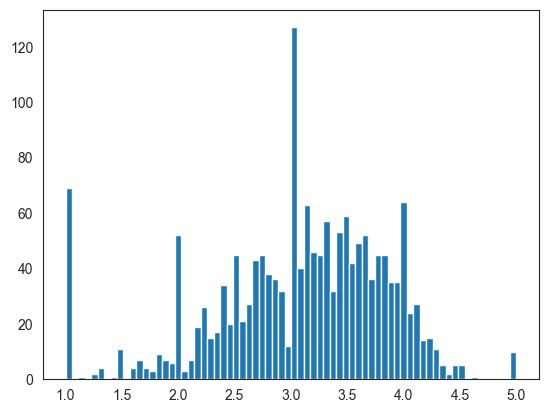

In [58]:
plt.hist(rating['rating'],bins=70)
plt.show()

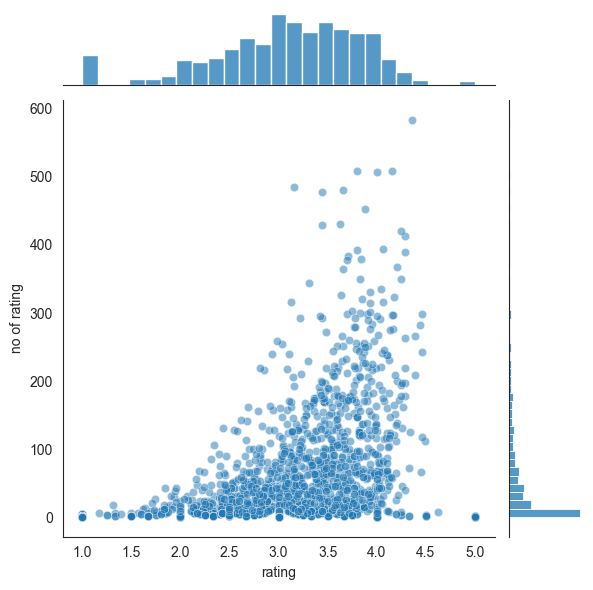

In [60]:
sns.jointplot(x='rating',y='no of rating',data=rating,alpha=0.5)

In [61]:
moviemat=df.pivot_table(index="user_id",columns='title',values='rating')

In [63]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [65]:
rating.sort_values('no of rating' ,ascending=False).head()

,rating,no of rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [69]:
starwar_user_rating=moviemat["Star Wars (1977)"]
starwar_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [70]:
moviemat.corrwith(starwar_user_rating)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [71]:
similar_to_starwar=moviemat.corrwith(starwar_user_rating)

In [73]:
corr_starwar=pd.DataFrame(similar_to_starwar, columns=['correlation'])

In [76]:
corr_starwar.dropna(inplace=True)
corr_starwar.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [78]:
corr_starwar.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Star Wars (1977),1.0
Stripes (1981),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
Commandments (1997),1.0
No Escape (1994),1.0
"Scarlet Letter, The (1926)",1.0
Safe Passage (1994),1.0


In [80]:
corr_starwar=corr_starwar.join(rating['no of rating'])
corr_starwar.head()

,correlation,no of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [83]:
corr_starwar[corr_starwar['no of rating']>100].sort_values('correlation',ascending=False).head()

,correlation,no of rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [91]:
def predict_movies(movie_name):
    movie_user_rating=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_to_movie, columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(rating['no of rating'])
    prediction=corr_movie[corr_movie['no of rating']>100].sort_values('correlation',ascending=False).head()
    return prediction

In [100]:
predict_movies("Raiders of the Lost Ark (1981)")

,correlation,no of rating
title,,
Raiders of the Lost Ark (1981),1.000000,420
Indiana Jones and the Last Crusade (1989),0.539606,331
"Empire Strikes Back, The (1980)",0.538659,367
Star Wars (1977),0.536117,583
Back to the Future (1985),0.506807,350
